<a href="https://colab.research.google.com/github/arijeetchoudhury100/fake_news_detection/blob/master/real_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arijeetchoudhury","key":"9839d199bf57c3d98b19f9b0de977309"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp -r kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

100% 41.0M/41.0M [00:01<00:00, 27.8MB/s]



In [5]:
!ls

drive  fake-and-real-news-dataset.zip  kaggle.json  sample_data


In [6]:
!unzip fake-and-real-news-dataset.zip
!ls

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                
drive				Fake.csv     sample_data
fake-and-real-news-dataset.zip	kaggle.json  True.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load the dataset
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [9]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
#concatenate the two datasets
fake_news['label'] = 1
true_news['label'] = 0
news_data = pd.concat([fake_news,true_news])
print(len(news_data))
news_data.head()

44898


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


1    23481
0    21417
Name: label, dtype: int64


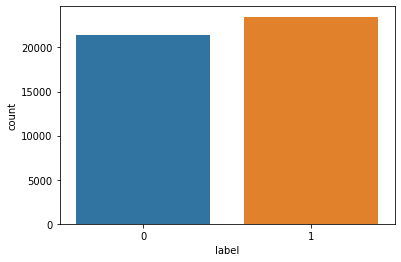

In [12]:
#check class distribution
print(news_data['label'].value_counts())
sns.countplot(news_data['label'])

In [13]:
print(news_data['subject'].value_counts())

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


In [14]:
#drop the subjects and date column
news_data.drop('subject',axis=1,inplace=True)
news_data.drop('date',axis=1,inplace=True)
news_data.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [15]:
#merge the title and text columns into one
news_data['news'] = news_data['title']+" "+news_data['text']
news_data.head()

,title,text,label,news
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...


In [16]:
news_data.drop('title',axis=1,inplace=True)
news_data.drop('text',axis=1,inplace=True)
news_data.head()

,label,news
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


In [0]:
#text cleaning
import re
import string
def remove_urls(text):
  return re.sub('https?:\S+','',text)

In [0]:
#remove urls from text
news_data['news'] = news_data['news'].apply(remove_urls)

In [0]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))

In [0]:
#remove punctuation from text
news_data['news'] = news_data['news'].apply(remove_punctuation)

In [0]:
def remove_tags(text):
  return re.sub('<.*?>'," ",text)

In [0]:
#remove any tags present in the text
news_data['news'] = news_data['news'].apply(remove_tags)

In [0]:
def remove_numbers(text):
  return re.sub('[0-9]+','',text)

In [0]:
#remove numbers from the text
news_data['news'] = news_data['news'].apply(remove_numbers)

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
#print(stops)

In [0]:
def remove_stopwords(text):
  cleaned = []
  for word in text.split():
    if word not in stops:
      cleaned.append(word)
  return " ".join(cleaned)

In [28]:
news_data['news'] = news_data['news'].apply(remove_stopwords)
news_data.head(10)

,label,news
0,1,Donald Trump Sends Out Embarrassing New Year’s...
1,1,Drunk Bragging Trump Staffer Started Russian C...
2,1,Sheriff David Clarke Becomes An Internet Joke ...
3,1,Trump Is So Obsessed He Even Has Obama’s Name ...
4,1,Pope Francis Just Called Out Donald Trump Duri...
5,1,Racist Alabama Cops Brutalize Black Boy While ...
6,1,Fresh Off The Golf Course Trump Lashes Out At ...
7,1,Trump Said Some INSANELY Racist Stuff Inside T...
8,1,Former CIA Director Slams Trump Over UN Bullyi...
9,1,WATCH BrandNew ProTrump Ad Features So Much A ...


In [29]:
#convert words to lower case
news_data['news'] = news_data['news'].apply(lambda word : word.lower())
news_data.head()

,label,news
0,1,donald trump sends out embarrassing new year’s...
1,1,drunk bragging trump staffer started russian c...
2,1,sheriff david clarke becomes an internet joke ...
3,1,trump is so obsessed he even has obama’s name ...
4,1,pope francis just called out donald trump duri...


In [30]:
#stemming/lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  lemmas = []
  for word in text.split():
    lemmas.append(lemmatizer.lemmatize(word))
  return " ".join(lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
news_data['lemmatized_news'] = news_data['news'].apply(lemmatize_words)

In [0]:
#split into X and y sets
#shuffle the dataset
news_data = news_data.sample(frac=1).reset_index(drop=True)
news_x = news_data['lemmatized_news'].values
news_y = news_data['label'].values

In [0]:
#tokenization,padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(news_x)
word_to_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(news_x)

In [0]:
vocab_size = len(word_to_index)
max_length = 200
embedding_dim = 100
padded_sequences = pad_sequences(sequences,maxlen=max_length,padding='post',truncating='post')

In [36]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O glove.6B.100d.txt

--2020-05-28 14:49:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘glove.6B.100d.txt’

glove.6B.100d.txt   100%[===================>] 331.04M  46.8MB/s    in 7.1s    

2020-05-28 14:49:21 (46.8 MB/s) - ‘glove.6B.100d.txt’ saved [347116733/347116733]



In [0]:
embeddings_index = {};
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [38]:
print(embeddings_matrix.shape)

(225654, 100)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SpatialDropout1D,LSTM,Bidirectional,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [46]:
model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.2),
    LSTM(64),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
optimizer = Adam(learning_rate=0.01)
callbacks = ReduceLROnPlateau(monitor='val_accuracy',patience=2,factor=0.5,min_lr=0.00001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 100)          22565400  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 256)          234496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 256)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [49]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(padded_sequences,news_y,test_size=0.15,random_state=1)
print('No. of training samples:',len(X_train))
print('No. of testing samples:',len(X_test))

No. of training samples: 38163
No. of testing samples: 6735


In [50]:
epochs = 10
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=64,callbacks=[callbacks])

Epoch 1/10
597/597 [==============================] - 31s 52ms/step - loss: 0.2735 - accuracy: 0.8836 - val_loss: 0.0268 - val_accuracy: 0.9950 - lr: 0.0100
Epoch 2/10
597/597 [==============================] - 30s 51ms/step - loss: 0.0228 - accuracy: 0.9946 - val_loss: 0.0123 - val_accuracy: 0.9975 - lr: 0.0100
Epoch 3/10
597/597 [==============================] - 30s 51ms/step - loss: 0.0144 - accuracy: 0.9965 - val_loss: 0.0109 - val_accuracy: 0.9978 - lr: 0.0100
Epoch 4/10
597/597 [==============================] - 30s 51ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0090 - val_accuracy: 0.9985 - lr: 0.0100
Epoch 5/10
597/597 [==============================] - 30s 51ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0128 - val_accuracy: 0.9964 - lr: 0.0100
Epoch 6/10
597/597 [==============================] - 30s 51ms/step - loss: 0.0098 - accuracy: 0.9978 - val_loss: 0.0083 - val_accuracy: 0.9982 - lr: 0.0100
Epoch 7/10
597/597 [==============================] - 30s 

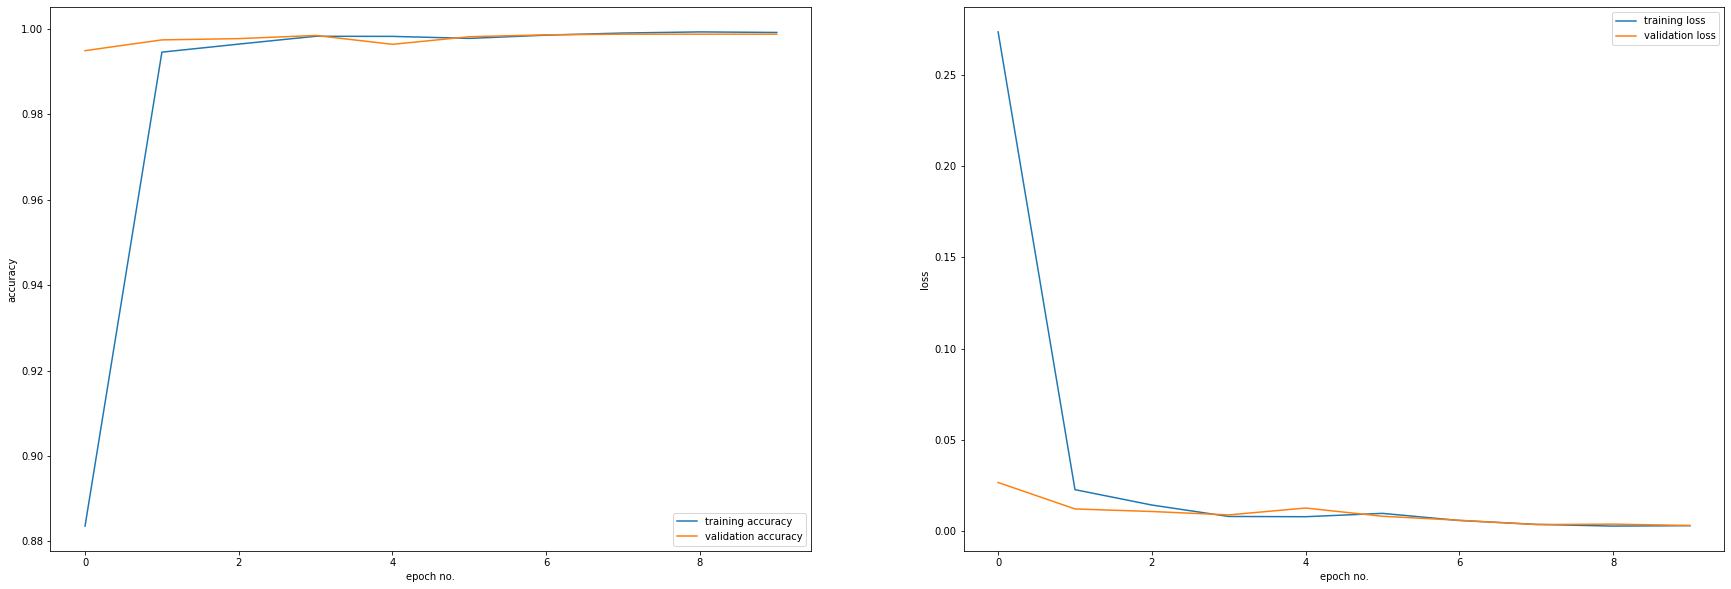

In [59]:
#plot the losses and accuracy
fig,axes = plt.subplots(1,2)
fig.set_size_inches(30,10)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(10))
axes[0].plot(epochs,acc,label='training accuracy')
axes[0].plot(epochs,val_acc,label='validation accuracy')
axes[0].set_xlabel('epoch no.')
axes[0].set_ylabel('accuracy')
axes[0].legend()
axes[1].plot(epochs,loss,label='training loss')
axes[1].plot(epochs,val_loss,label='validation loss')
axes[1].set_xlabel('epoch no.')
axes[1].set_ylabel('loss')
axes[1].legend()

In [64]:
#model evaluation
train_stats = model.evaluate(X_train,y_train)
test_stats = model.evaluate(X_test,y_test)
print('training accuracy:',train_stats[1]*100)
print('testing accuracy:',test_stats[1]*100)

211/211 [==============================] - 3s 17ms/step - loss: 0.0032 - accuracy: 0.9988
training accuracy: 99.97379779815674
testing accuracy: 99.8812198638916


In [0]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_test,y_pred))
print('Confusion matix:\n',confusion_matrix(y_test,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3188
           1       1.00      1.00      1.00      3547

    accuracy                           1.00      6735
   macro avg       1.00      1.00      1.00      6735
weighted avg       1.00      1.00      1.00      6735

Confusion matix:
 [[3183    5]
 [   3 3544]]
